In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.models import load_model
import h5py
import random

Using TensorFlow backend.


In [2]:
hitters = pd.read_csv("hitters2.csv") \
    .set_index('Name')

In [3]:
hitters = hitters.drop('Number',axis = 1)
hitters.head()

,HR,R,RBI,SB,BB%,K%,BABIP,AVG,OBP,SLG,...,Z-Swing%,Contact%,Soft%,Hard%,wRAA,Off,launch_speed,launch_angle,whiffs,wRC+(Next)
Name,,,,,,,,,,,,,,,,,,,,,
A.J. Pierzynski,9,38,49,0,4.4,8.5,0.310,0.300,0.339,0.430,...,75.7,87.0,20.1,26.0,6.9,0.6,85.1,11.8,114,41
Aaron Hicks,11,48,33,13,8.7,16.9,0.285,0.256,0.323,0.398,...,68.8,80.4,20.1,25.4,0.4,-1.5,87.2,11.2,138,64
Aaron Hill,6,32,39,7,8.8,15.3,0.253,0.230,0.295,0.345,...,65.3,84.2,15.4,31.5,-9.0,-11.5,87.7,12.7,94,90
Adam Eaton,14,98,56,18,8.4,19.0,0.345,0.287,0.361,0.431,...,60.4,83.7,20.4,26.3,18.2,22.5,85.4,8.6,224,117
Adam Jones,27,74,82,3,4.1,17.6,0.286,0.269,0.308,0.474,...,80.6,77.8,20.1,30.7,9.7,7.2,87.1,12.3,290,98


In [4]:
#Get data formatted
X = hitters.iloc[:,0:(len(hitters.columns) - 1)]
y = hitters.iloc[:, len(hitters.columns) - 1]
X_scale = preprocessing.StandardScaler().fit_transform(X)
#pca = PCA(n_components = 10)
#X_pca = pca.fit_transform(X)

In [5]:
#Split data and define cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)

# X_train = preprocessing.scale(X_train, axis = 1)
# X_test = preprocessing.scale(X_test, axis = 1)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
kf = KFold(5, shuffle=True)
lm = RidgeCV(alphas = np.logspace(-3, 3, 10), cv = kf).fit(X_train, y_train)
pred = lm.predict(X_test)
print(mean_squared_error(y_test,np.round(pred)))
print(lm.alpha_)

347.979020979
46.4158883361


In [7]:
def buildmodel():
    model = Sequential()
    
    model.add(Dense(
        input_dim = X_train.shape[1],
        units= 23,
        activation="relu"
    ))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(
        units = 8,
        activation="relu"
    ))    
        
    model.add(Dense(
        units= 1,
        activation = "linear",
    ))
    
    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9) 

    model.compile(loss = 'mse', optimizer= 'adam', metrics = ['mae']) 
    return model

486
349.734265734


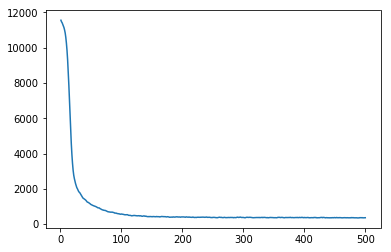

In [8]:
nn = buildmodel()

scores = []
for i in range(1,501):
    nn.fit(X_train, y_train, epochs = 1, batch_size = 32, verbose =0)
    prediction= np.round(nn.predict(X_test))
    error = mean_squared_error(y_test,prediction)
    scores.append(error)
    
print(np.argmin(scores))
print(np.min(scores))
plt.plot(np.linspace(1,500,500), scores)

In [9]:
#nn = buildmodel()
#nn = KerasRegressor(build_fn=buildmodel, epochs=1000, batch_size=25, verbose=1).fit(X_train,y_train)
#results = cross_val_score(nn, scaler.fit_transform(X), y, cv=kf)
#nn.fit(X_train, y_train, epochs = 300, batch_size = 32, verbose =1)

In [10]:
#prediction= np.round(nn.predict(X_test))
# Print the accuracy:
#print(prediction)
#print(mean_squared_error(y_test,prediction))
#print(nn.evaluate(X_test, y_test))

In [11]:
#528.9 Ridge 485.2 NN

In [12]:
#nn.save('my_model2.h5')  # creates a HDF5 file 'my_model.h5'
#del nn  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [13]:
hitters2018 = pd.read_csv("hitters20182.csv") \
    .set_index('Name')

In [14]:
hitters2018 = hitters2018.drop('Number',axis = 1)
hitters2018.head()

,HR,R,RBI,SB,BB%,K%,BABIP,AVG,OBP,SLG,...,O-Swing%,Z-Swing%,Contact%,Soft%,Hard%,wRAA,Off,launch_speed,launch_angle,whiffs
Name,,,,,,,,,,,,,,,,,,,,,
A.J. Pollock,21,61,65,13,6.7,21.7,0.284,0.257,0.316,0.484,...,33.6,67.3,77.8,11.2,44.6,8.7,9.3,83.4,15.2,199
Aaron Altherr,8,28,38,3,12.6,31.9,0.247,0.181,0.295,0.333,...,26.9,68.5,69.1,21.4,37.0,-7.6,-10.0,83.5,13.1,170
Aaron Hicks,27,90,79,11,15.5,19.1,0.264,0.248,0.366,0.467,...,20.9,65.5,78.0,18.6,39.5,21.4,26.0,83.7,16.6,230
Aaron Judge,27,77,67,6,15.3,30.5,0.368,0.278,0.392,0.528,...,25.1,63.8,65.9,13.5,48.1,31.0,30.3,87.9,15.5,310
Adalberto Mondesi,14,47,37,32,3.8,26.5,0.335,0.276,0.306,0.498,...,37.1,79.3,67.0,17.8,43.1,6.2,10.0,81.6,18.6,204


In [15]:
nn2 = buildmodel()
nn2.fit(X_scale, y, epochs = 300, batch_size = 32, verbose =1)

Epoch 1/300
714/714 [==============================] - 0s 321us/step - loss: 11254.2363 - mean_absolute_error: 103.2603
Epoch 2/300
714/714 [==============================] - 0s 42us/step - loss: 11101.5613 - mean_absolute_error: 102.5600
Epoch 3/300
714/714 [==============================] - 0s 45us/step - loss: 10954.8393 - mean_absolute_error: 101.8652
Epoch 4/300
714/714 [==============================] - 0s 42us/step - loss: 10737.2062 - mean_absolute_error: 100.7891
Epoch 5/300
714/714 [==============================] - 0s 43us/step - loss: 10481.9354 - mean_absolute_error: 99.5505
Epoch 6/300
714/714 [==============================] - 0s 43us/step - loss: 10093.1723 - mean_absolute_error: 97.6125
Epoch 7/300
714/714 [==============================] - 0s 43us/step - loss: 9629.2336 - mean_absolute_error: 95.0909
Epoch 8/300
714/714 [==============================] - 0s 44us/step - loss: 8933.7450 - mean_absolute_error: 91.3630
Epoch 9/300
714/714 [==============================] 

714/714 [==============================] - 0s 42us/step - loss: 932.0785 - mean_absolute_error: 24.6271
Epoch 139/300
714/714 [==============================] - 0s 48us/step - loss: 945.6443 - mean_absolute_error: 24.4622
Epoch 140/300
714/714 [==============================] - 0s 55us/step - loss: 870.9967 - mean_absolute_error: 23.4081
Epoch 141/300
714/714 [==============================] - 0s 51us/step - loss: 804.1774 - mean_absolute_error: 22.4455
Epoch 142/300
714/714 [==============================] - 0s 48us/step - loss: 872.8601 - mean_absolute_error: 23.8149
Epoch 143/300
714/714 [==============================] - 0s 51us/step - loss: 839.2190 - mean_absolute_error: 23.2008
Epoch 144/300
714/714 [==============================] - 0s 48us/step - loss: 874.5567 - mean_absolute_error: 23.8820
Epoch 145/300
714/714 [==============================] - 0s 49us/step - loss: 844.4007 - mean_absolute_error: 23.2033
Epoch 146/300
714/714 [==============================] - 0s 46us/step 

714/714 [==============================] - 0s 43us/step - loss: 680.2236 - mean_absolute_error: 20.8007
Epoch 277/300
714/714 [==============================] - 0s 43us/step - loss: 646.5049 - mean_absolute_error: 20.0999
Epoch 278/300
714/714 [==============================] - 0s 49us/step - loss: 657.3083 - mean_absolute_error: 20.1517
Epoch 279/300
714/714 [==============================] - 0s 54us/step - loss: 649.9806 - mean_absolute_error: 19.8097
Epoch 280/300
714/714 [==============================] - 0s 51us/step - loss: 649.6845 - mean_absolute_error: 20.3335
Epoch 281/300
714/714 [==============================] - 0s 50us/step - loss: 622.4816 - mean_absolute_error: 19.5636
Epoch 282/300
714/714 [==============================] - 0s 50us/step - loss: 665.8400 - mean_absolute_error: 20.3826
Epoch 283/300
714/714 [==============================] - 0s 46us/step - loss: 605.6423 - mean_absolute_error: 19.7004
Epoch 284/300
714/714 [==============================] - 0s 41us/step 

In [16]:
pujols = np.where(hitters2018.index == 'Albert Pujols')
trout = np.where(hitters2018.index == 'Mike Trout')
pollock = np.where(hitters2018.index == 'A.J. Pollock')
betts = np.where(hitters2018.index == 'Mookie Betts')
X2018 = scaler.fit_transform(hitters2018)

In [12]:
pca = PCA()
x_pca = pca.fit_transform(X)

In [18]:
print(nn.predict(X2018[pujols[0],]))
print(nn.predict(X2018[pollock[0],]))
print(nn.predict(X2018[trout[0],]))
print(nn.predict(X2018[betts[0],]))

[[ 97.72055817]]
[[ 106.08755493]]
[[ 144.72727966]]
[[ 152.04632568]]


In [19]:
print(nn2.predict(X2018[pujols[0],]))
print(nn2.predict(X2018[pollock[0],]))
print(nn2.predict(X2018[trout[0],]))
print(nn2.predict(X2018[betts[0],]))

[[ 95.15964508]]
[[ 106.35624695]]
[[ 147.8475647]]
[[ 158.22198486]]


(714, 23) (714, 23)
0.989749255865


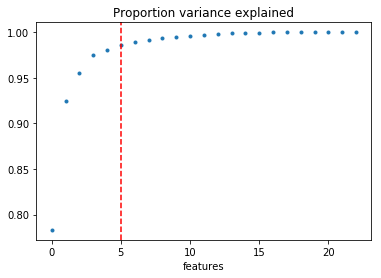

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '.')
plt.title("Proportion variance explained")
plt.xlabel("features")
plt.axvline(x=5,linestyle ='--', color = 'red')
plt.savefig("pca.png")
print(X.shape, x_pca.shape)
print(np.cumsum(pca.explained_variance_ratio_)[6])


In [30]:
pca2 = PCA(n_components= 5)
xtrain_pca = pca2.fit_transform(X_train)
xtest_pca = pca2.transform(X_test)
#plt.plot(np.cumsum(pca2.explained_variance_ratio_), '.')
#plt.title("Proportion variance explained")
#plt.xlabel("features")
#print(xtrain_pca.shape)
#print(np.cumsum(pca2.explained_variance_ratio_)[])

In [28]:
def buildmodel2():
    model = Sequential()
    
    model.add(Dense(
        input_dim = 5,
        units= 5,
        activation="relu"
    ))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(
        units = 2,
        activation="relu"
    ))    
        
    model.add(Dense(
        units= 1,
        activation = "linear",
    ))
    
    sgd = SGD(lr=0.001, decay=1e-7, momentum=.9) 

    model.compile(loss = 'mse', optimizer= 'adam', metrics = ['mae']) 
    return model

499
583.79020979


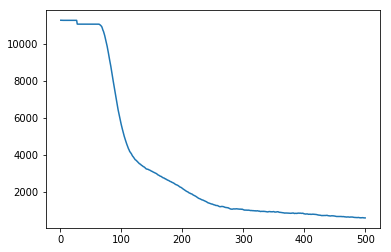

In [19]:
nn_pca = buildmodel2()

scores = []
for i in range(1,501):
    nn_pca.fit(xtrain_pca, y_train, epochs = 1, batch_size = 32, verbose =0)
    prediction= np.round(nn_pca.predict(xtest_pca))
    error = mean_squared_error(y_test,prediction)
    scores.append(error)
    
print(np.argmin(scores))
print(np.min(scores))
plt.plot(np.linspace(1,500,500), scores)

In [24]:
#nn_pca = buildmodel2()
#nn_pca.fit(xtrain_pca, y_train, epochs = 500, batch_size = 32, verbose =1)

In [25]:
#predictionpca= np.round(nn_pca.predict(xtest_pca))
# Print the accuracy:
#print(predictionpca)
#print(mean_squared_error(y_test,predictionpca))

In [26]:
print(X.shape[1])

23


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predlr = lr.predict(X_test)
print(mean_squared_error(y_test,np.round(predlr)))

342.923076923


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [28]:
print(xtrain_pca.shape[1])

10


In [31]:
#Full Script
X = hitters.iloc[:,0:(len(hitters.columns) - 1)]
y = hitters.iloc[:, len(hitters.columns) - 1]

linreg = []
ridreg = []
nn1 = []
nn1epoch = []
nn2 = []
nn2epoch = []

for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    pca2 = PCA(n_components= 10)
    xtrain_pca = pca2.fit_transform(X_train)
    xtest_pca = pca2.transform(X_test)
    lr.fit(X_train, y_train)
    predlr = lr.predict(X_test)
    linreg.append(mean_squared_error(y_test,np.round(predlr)))
    kf = KFold(5, shuffle=True)
    lm = RidgeCV(alphas = np.logspace(-3, 3, 10), cv = kf).fit(X_train, y_train)
    pred = lm.predict(X_test)
    ridreg.append(mean_squared_error(y_test,np.round(pred)))
    nn = buildmodel()
    nn_pca = buildmodel2()
    scores = []
    for i in range(1,501):
        nn.fit(X_train, y_train, epochs = 1, batch_size = 32, verbose =0)
        prediction= np.round(nn.predict(X_test))
        error = mean_squared_error(y_test,prediction)
        scores.append(error)
    nn1epoch.append(np.argmin(scores))
    nn1.append(np.min(scores))
    scores = []
    for i in range(1,501):
        nn_pca.fit(xtrain_pca, y_train, epochs = 1, batch_size = 32, verbose =0)
        prediction= np.round(nn_pca.predict(xtest_pca))
        error = mean_squared_error(y_test,prediction)
        scores.append(error)
    nn2epoch.append(np.argmin(scores))
    nn2.append(np.min(scores))
    

In [34]:
print(" Average Linear Regression MSE: ", np.mean(linreg),
     "\n Average Ridge Regression MSE: ", np.mean(ridreg),
     "\n Average Neural Net 1 MSE: ", np.mean(nn1),
     "\n Average Neural Net 2 MSE: ", np.mean(nn2))

 Average Linear Regression MSE:  424.166433566 
 Average Ridge Regression MSE:  419.00979021 
 Average Neural Net 1 MSE:  418.486713287 
 Average Neural Net 2 MSE:  463.26013986


In [35]:
print(nn1epoch, nn2epoch)
#410 Ridge, 412 LR, 404.8 NN1(445), NN2 405.5 (497)

[298, 495, 305, 456, 364] [493, 466, 462, 486, 247]


In [31]:
nn2 = []
nn2epoch = []
for i in range(1,5):   
    scores = []
    nn_pca = buildmodel2()
    for i in range(1,501):
        nn_pca.fit(xtrain_pca, y_train, epochs = 1, batch_size = 32, verbose =0)
        prediction= np.round(nn_pca.predict(xtest_pca))
        error = mean_squared_error(y_test,prediction)
        scores.append(error)
    nn2epoch.append(np.argmin(scores))
    nn2.append(np.min(scores))
print(np.mean(nn2))


458.601398601
